## Quick start with some modifications

In [1]:
import matplotlib.pyplot as plt 
import sys 
sys.path.append('../')

In [2]:
from wompth.models.base import NeuralNetwork

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms.transforms import ToTensor

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
train_loader =  DataLoader(training_data, batch_size=64)

/home/gorigan/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
test_data = datasets.FashionMNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
    )
test_loader = DataLoader(test_data, batch_size=64)

In [6]:
classes = [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ]

nn = NeuralNetwork(layout=[28 * 28, 256, 256, 10], class_labels=classes)

Using cuda device


In [7]:
nn.fit(
        train_loader=train_loader, test_loader=test_loader, epochs=10
    )


Epoch 1
-------------------------------
loss: 2.299021  [    0/60000]
loss: 2.294440  [ 6400/60000]
loss: 2.284684  [12800/60000]
loss: 2.278849  [19200/60000]
loss: 2.264989  [25600/60000]
loss: 2.239579  [32000/60000]
loss: 2.249160  [38400/60000]
loss: 2.224037  [44800/60000]
loss: 2.228089  [51200/60000]
loss: 2.200226  [57600/60000]
Test Error: 
 Accuracy: 34.3%, Avg loss: 2.196127 

Epoch 2
-------------------------------
loss: 2.202736  [    0/60000]
loss: 2.197536  [ 6400/60000]
loss: 2.157928  [12800/60000]
loss: 2.165621  [19200/60000]
loss: 2.121878  [25600/60000]
loss: 2.069984  [32000/60000]
loss: 2.101666  [38400/60000]
loss: 2.037083  [44800/60000]
loss: 2.052236  [51200/60000]
loss: 1.981477  [57600/60000]
Test Error: 
 Accuracy: 48.4%, Avg loss: 1.980604 

Epoch 3
-------------------------------
loss: 2.011905  [    0/60000]
loss: 1.987886  [ 6400/60000]
loss: 1.893296  [12800/60000]
loss: 1.916422  [19200/60000]
loss: 1.820517  [25600/60000]
loss: 1.763037  [32000/600

In [8]:
result = nn.predict(test_loader)

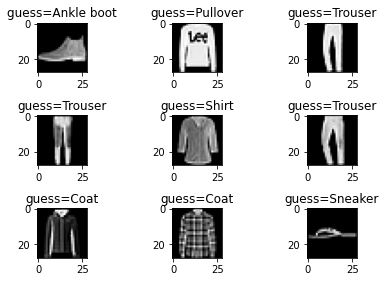

In [24]:
figure, axes = plt.subplots(nrows=3, ncols=3)

i = 0
for row in axes: 
    for col in row:
        y = test_loader.dataset[i][1]
        X = test_loader.dataset[i][0]
        col.set_title(f'guess={result[i]}')
        col.imshow(X[0], cmap=plt.get_cmap('gray'))
        i += 1
figure.tight_layout(pad=1.0)

In [27]:
nn.state_dict().keys()

odict_keys(['_linear_relu_stack.0.weight', '_linear_relu_stack.0.bias', '_linear_relu_stack.2.weight', '_linear_relu_stack.2.bias', '_linear_relu_stack.4.weight', '_linear_relu_stack.4.bias'])